#Dependencies


In [87]:
%cd /content/drive/MyDrive/data/
import sys
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]==1.2.1
import sklearn 
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from sklearn.metrics.pairwise import pairwise_distances
import random
from scipy.sparse import spdiags
from functools import partial
from networkx.algorithms.link_analysis.pagerank_alg import pagerank
import math
import scipy.linalg as la
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import tensorflow as tf
from tensorflow import keras
from tensorflow import compat
from keras import layers, metrics, losses, optimizers, callbacks, regularizers
import os
from sklearn.metrics import auc, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import scale
from sklearn.model_selection import StratifiedKFold
import sklearn.preprocessing as prep
tf.compat.v1.disable_eager_execution()
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import FullBatchLinkGenerator
from stellargraph.layer import GCN, LinkEmbedding
from sklearn import preprocessing, feature_extraction, model_selection
from stellargraph import globalvar
from stellargraph import datasets
from stellargraph.core.graph import StellarGraph

/content/drive/MyDrive/data


#**Welcome to our Link Prediction Project**

**Enes Batuhan Ay 20160808031** // **Fatime Nur Çelik 20160808019** // **Kaan Süner 20160807018**


This is DTI prediction project that combines low dimensional feature vectors with GCN model. AUROC and AUPR scorest shows our result.

##Reading Interactions

In [89]:
"Drug List"
df_drug= pd.read_table("drug.txt",header=None)
#df_drug=df_drug.loc[0:199]

"Side Effect List"
df_se=pd.read_table("se.txt",header=None)
df_se=df_se.loc[0:199]

"Disease List"
df_disease= pd.read_table("disease.txt",header=None)
df_disease=df_disease.loc[0:199]

"Protein List"
df_protein= pd.read_table("protein.txt",header=None)
df_protein=df_protein.loc[0:199]

"Drug - Drug Interaction Matrix"
df_mat_drug_drug= pd.read_table("mat_drug_drug.txt",sep=' ',header=None)
df_mat_drug_drug=df_mat_drug_drug.loc[0:199,0:199]
df_mat_drug_drug.index=df_drug[0].loc[0:199].values

"Drug - SideEffect Interaction Matrix"
df_mat_drug_se= pd.read_table("mat_drug_se.txt",sep=' ',header=None)
df_mat_drug_se=df_mat_drug_se.loc[0:199,0:199]
df_mat_drug_se.index=df_drug[0].loc[0:199].values

"Drug - Disease Interaction Matrix"
df_mat_drug_disease= pd.read_table("mat_drug_disease.txt",sep=' ',header=None)
df_mat_drug_disease=df_mat_drug_disease.loc[0:199,0:199]
df_mat_drug_disease.index=df_drug[0].loc[0:199]
df_mat_drug_disease.columns=df_disease[0].loc[0:199].values

"Drug - Protein Interaction Matrix"
df_mat_drug_protein= pd.read_table("mat_drug_protein.txt",sep=' ',header=None)
df_mat_drug_protein=df_mat_drug_protein.loc[0:199,0:199]
df_mat_drug_protein.index=df_drug[0].loc[0:199,].values

"Protein-Protein Interaction Matrix"
df_mat_protein_protein= pd.read_table("mat_protein_protein.txt",sep=' ',header=None)
df_mat_protein_protein=df_mat_protein_protein.loc[0:499,0:499]

"Protein - Disease Interaction Matrix"
df_mat_protein_disease= pd.read_table("mat_protein_disease.txt",sep=' ',header=None)
df_mat_protein_disease=df_mat_protein_disease.loc[0:199,0:199]
df_mat_protein_disease.columns=df_disease.loc[0:199].values

##Graph Generating

In [90]:
def buildGraph(G,dataframe):
  for i in dataframe.index:
    for j in dataframe.columns:
      if dataframe.loc[i][j] ==1:
        G.add_edge(i,j)


In [91]:
"Drug - Drug"
G_drug_drug= nx.Graph()
buildGraph(G_drug_drug,df_mat_drug_drug)
nx.info(G_drug_drug)

'Graph with 286 nodes and 826 edges'

In [92]:
"Drug - Disease"
G_drug_disease = nx.Graph()
buildGraph(G_drug_disease,df_mat_drug_disease)
nx.info(G_drug_disease)

'Graph with 386 nodes and 10391 edges'

In [93]:
"Drug - Protein"
G_drug_protein = nx.Graph()
buildGraph(G_drug_protein,df_mat_drug_protein)
nx.info(G_drug_protein)

'Graph with 159 nodes and 180 edges'

In [94]:
"Drug - SideEffect"
G_drug_se = nx.Graph()
buildGraph(G_drug_se,df_mat_drug_se)
nx.info(G_drug_se)

'Graph with 396 nodes and 8557 edges'

In [95]:
"Protein - Protein"
G_protein_protein = nx.Graph()
buildGraph(G_protein_protein,df_mat_protein_protein)
nx.info(G_protein_protein)

'Graph with 330 nodes and 515 edges'

In [96]:
"Protein - Disease"
G_protein_disease = nx.Graph()
buildGraph(G_protein_disease,df_mat_protein_disease)
nx.info(G_protein_disease)

'Graph with 400 nodes and 34553 edges'

##Graph Drawing

###Drug - Drug

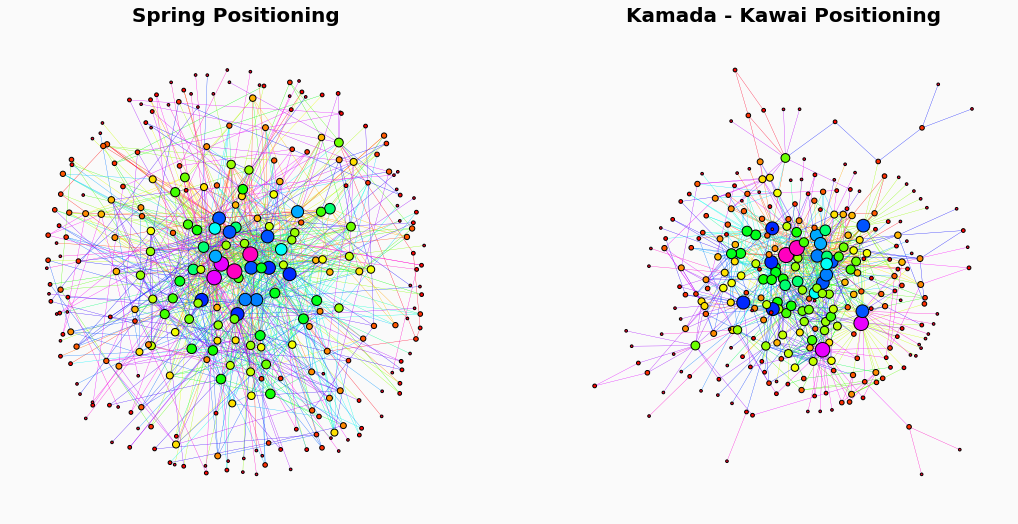

In [97]:
pos_spring= nx.spring_layout(G_drug_drug,k=0.7)
pos_kawai= nx.kamada_kawai_layout(G_drug_drug)

deg_centrality = nx.degree_centrality(G_drug_drug)
centrality = np.fromiter(deg_centrality.values(), float)

fig=plt.figure(1,figsize=(18,9),facecolor='#fafafa')
gs = fig.add_gridspec(1, 2)

"""----Graph Options----"""

Graph=G_drug_drug
size_coef=2000
edge_width=0.3
edgeColor=range(Graph.number_of_edges())
nodeSize=centrality*size_coef
nodeColor=centrality
nodeCmap=plt.cm.gist_rainbow
edgeCmap=plt.cm.gist_rainbow
node_border_color='black'


"""---------Spring---------"""
ax1 = fig.add_subplot(gs[0, 0])
nx.draw_networkx_nodes(Graph, pos_spring, node_size=nodeSize, node_color=nodeColor,cmap=nodeCmap,edgecolors=node_border_color)
nx.draw_networkx_edges(Graph, pos_spring, width=edge_width, style="solid", edge_color=edgeColor, edge_cmap=edgeCmap)

plt.title(label="Spring Positioning",fontsize=20,color="black",fontweight='bold')
plt.axis('off')

"""---------Kamada - Kawai---------"""
ax2 = fig.add_subplot(gs[0, 1])
nx.draw_networkx_nodes(Graph, pos_kawai, node_size=nodeSize, node_color=nodeColor,cmap=nodeCmap,edgecolors=node_border_color)
nx.draw_networkx_edges(Graph, pos_kawai, width=edge_width, style="solid", edge_color=edgeColor,edge_cmap=edgeCmap)
plt.title(label="Kamada - Kawai Positioning",fontsize=20,color="black",fontweight='bold')
plt.axis('off')

plt.show()

###Drug - Disease

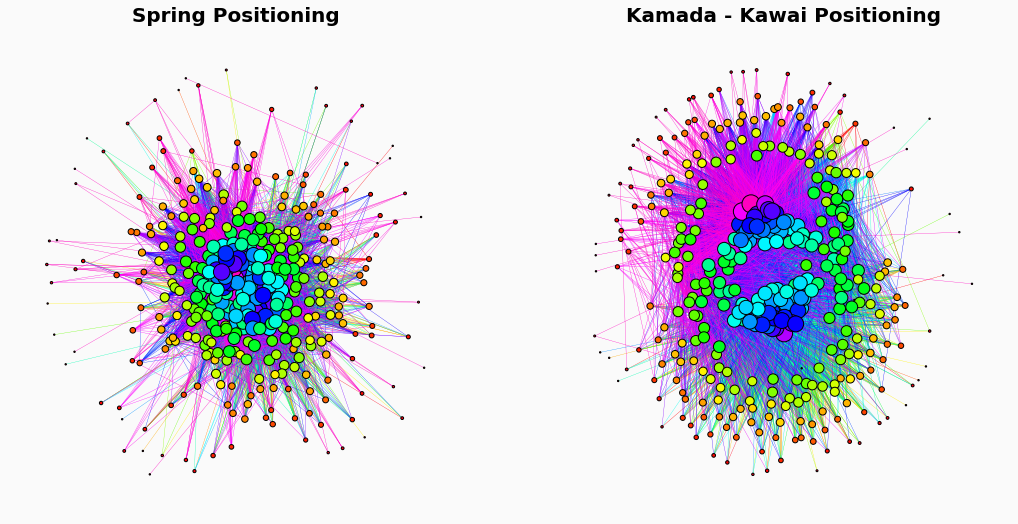

In [98]:
pos_spring= nx.spring_layout(G_drug_disease,k=0.7)
pos_kawai= nx.kamada_kawai_layout(G_drug_disease)

deg_centrality = nx.degree_centrality(G_drug_disease)
centrality = np.fromiter(deg_centrality.values(), float)

fig=plt.figure(1,figsize=(18,9),facecolor='#fafafa')
gs = fig.add_gridspec(1, 2)

"""----Graph Options----"""

Graph=G_drug_disease
size_coef=750
edge_width=0.3
edgeColor=range(Graph.number_of_edges())
nodeSize=centrality*size_coef
nodeColor=centrality
nodeCmap=plt.cm.gist_rainbow
edgeCmap=plt.cm.gist_rainbow
node_border_color='black'

"""---------Spring---------"""
ax1 = fig.add_subplot(gs[0, 0])
nx.draw_networkx_nodes(Graph, pos_spring, node_size=nodeSize, node_color=nodeColor,cmap=nodeCmap,edgecolors=node_border_color)
nx.draw_networkx_edges(Graph, pos_spring, width=edge_width, style="solid", edge_color=edgeColor, edge_cmap=edgeCmap)
plt.title(label="Spring Positioning",fontsize=20,color="black",fontweight='bold')
plt.axis('off')

"""---------Kamada - Kawai---------"""
ax2 = fig.add_subplot(gs[0, 1])
nx.draw_networkx_nodes(Graph, pos_kawai, node_size=nodeSize, node_color=nodeColor,cmap=nodeCmap,edgecolors=node_border_color)
nx.draw_networkx_edges(Graph, pos_kawai, width=edge_width, style="solid", edge_color=edgeColor,edge_cmap=edgeCmap)
plt.title(label="Kamada - Kawai Positioning",fontsize=20,color="black",fontweight='bold')
plt.axis('off')

plt.show()

###Drug - Protein

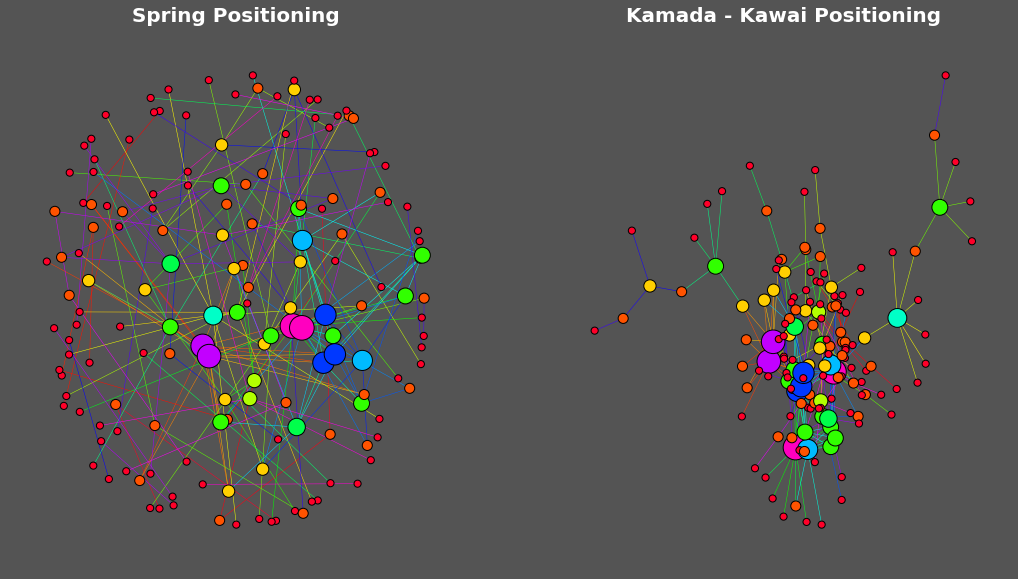

In [99]:
pos_spring= nx.spring_layout(G_drug_protein,k=0.7)
pos_kawai= nx.kamada_kawai_layout(G_drug_protein)

deg_centrality = nx.degree_centrality(G_drug_protein)
centrality = np.fromiter(deg_centrality.values(), float)

fig=plt.figure(1,figsize=(18,10),facecolor='#545454')
gs = fig.add_gridspec(1, 2)

"""----Graph Options----"""

Graph=G_drug_protein
size_coef=8000
edge_width=0.5
edgeColor=range(Graph.number_of_edges())
nodeSize=centrality*size_coef
nodeColor=centrality
nodeCmap=plt.cm.gist_rainbow
edgeCmap=plt.cm.gist_rainbow
node_border_color='black'

"""---------Spring---------"""
ax1 = fig.add_subplot(gs[0, 0])
nx.draw_networkx_nodes(Graph, pos_spring, node_size=nodeSize, node_color=nodeColor,cmap=nodeCmap,edgecolors=node_border_color)
nx.draw_networkx_edges(Graph, pos_spring, width=edge_width, style="solid", edge_color=edgeColor, edge_cmap=edgeCmap)
plt.title(label="Spring Positioning",fontsize=20,color="white",fontweight='bold')
plt.axis('off')

"""---------Kamada - Kawai---------"""
ax2 = fig.add_subplot(gs[0, 1])
nx.draw_networkx_nodes(Graph, pos_kawai, node_size=nodeSize, node_color=nodeColor,cmap=nodeCmap,edgecolors=node_border_color)
nx.draw_networkx_edges(Graph, pos_kawai, width=edge_width, style="solid", edge_color=edgeColor,edge_cmap=edgeCmap)
plt.title(label="Kamada - Kawai Positioning",fontsize=20,color="white",fontweight='bold')
plt.axis('off')

plt.show()

###Drug - Side Effect

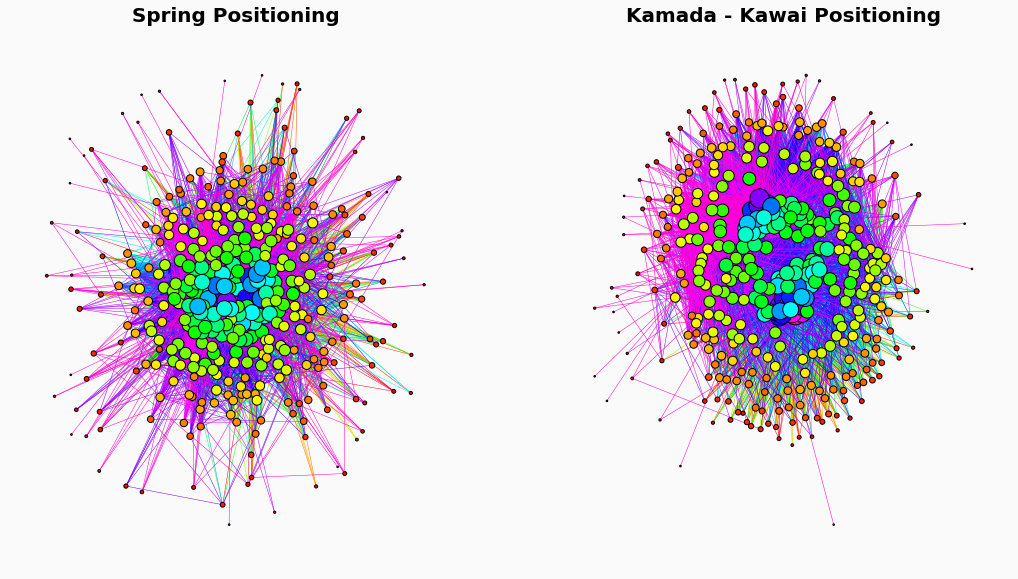

In [100]:
pos_spring= nx.spring_layout(G_drug_se,k=0.7)
pos_kawai= nx.kamada_kawai_layout(G_drug_se)

deg_centrality = nx.degree_centrality(G_drug_se)
centrality = np.fromiter(deg_centrality.values(), float)

fig=plt.figure(1,figsize=(18,10),facecolor='#fafafa')
gs = fig.add_gridspec(1, 2)

"""----Graph Options----"""

Graph=G_drug_se
size_coef=1000
edge_width=0.5
edgeColor=range(Graph.number_of_edges())
nodeSize=centrality*size_coef
nodeColor=centrality
nodeCmap=plt.cm.gist_rainbow
edgeCmap=plt.cm.gist_rainbow
node_border_color='black'

"""---------Spring---------"""
ax1 = fig.add_subplot(gs[0, 0])
nx.draw_networkx_nodes(Graph, pos_spring, node_size=nodeSize, node_color=nodeColor,cmap=nodeCmap,edgecolors=node_border_color)
nx.draw_networkx_edges(Graph, pos_spring, width=edge_width, style="solid", edge_color=edgeColor, edge_cmap=edgeCmap)
plt.title(label="Spring Positioning",fontsize=20,color="black",fontweight='bold')
plt.axis('off')

"""---------Kamada - Kawai---------"""
ax2 = fig.add_subplot(gs[0, 1])
nx.draw_networkx_nodes(Graph, pos_kawai, node_size=nodeSize, node_color=nodeColor,cmap=nodeCmap,edgecolors=node_border_color)
nx.draw_networkx_edges(Graph, pos_kawai, width=edge_width, style="solid", edge_color=edgeColor,edge_cmap=edgeCmap)
plt.title(label="Kamada - Kawai Positioning",fontsize=20,color="black",fontweight='bold')
plt.axis('off')

plt.show()

###Protein - Protein 

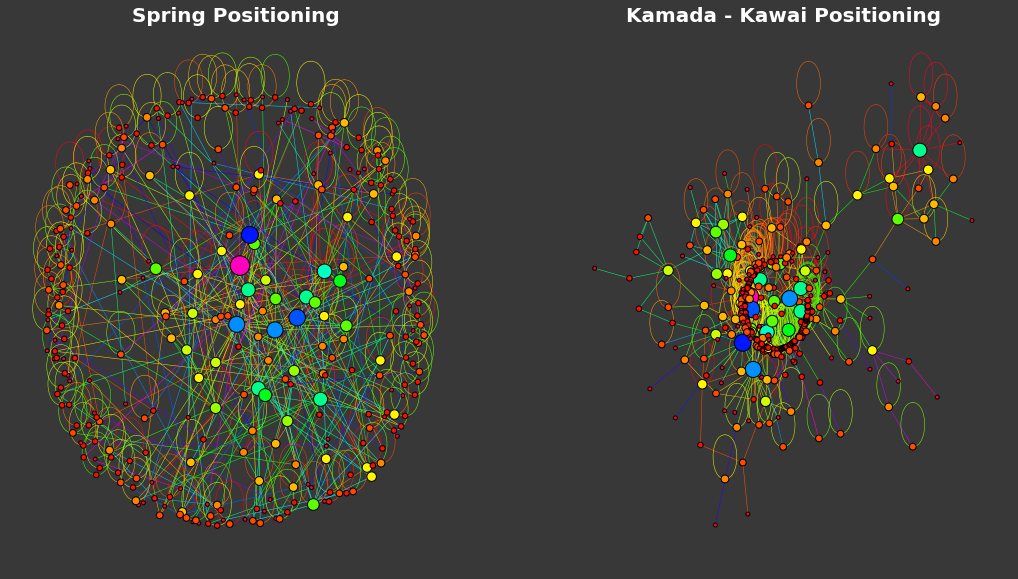

In [101]:
pos_spring= nx.spring_layout(G_protein_protein,k=0.7)
pos_kawai= nx.kamada_kawai_layout(G_protein_protein)

deg_centrality = nx.degree_centrality(G_protein_protein)
centrality = np.fromiter(deg_centrality.values(), float)

fig=plt.figure(1,figsize=(18,10),facecolor='#383838')
gs = fig.add_gridspec(1, 2)

"""----Graph Options----"""

Graph=G_protein_protein
size_coef=5000
edge_width=0.5
edgeColor=range(Graph.number_of_edges())
nodeSize=centrality*size_coef
nodeColor=centrality
nodeCmap=plt.cm.gist_rainbow
edgeCmap=plt.cm.gist_rainbow
node_border_color='black'

"""---------Spring---------"""
ax1 = fig.add_subplot(gs[0, 0])
nx.draw_networkx_nodes(Graph, pos_spring, node_size=nodeSize, node_color=nodeColor,cmap=nodeCmap,edgecolors=node_border_color)
nx.draw_networkx_edges(Graph, pos_spring, width=edge_width, style="solid", edge_color=edgeColor, edge_cmap=edgeCmap)
plt.title(label="Spring Positioning",fontsize=20,color="white",fontweight='bold')
plt.axis('off')

"""---------Kamada - Kawai---------"""
ax2 = fig.add_subplot(gs[0, 1])
nx.draw_networkx_nodes(Graph, pos_kawai, node_size=nodeSize, node_color=nodeColor,cmap=nodeCmap,edgecolors=node_border_color)
nx.draw_networkx_edges(Graph, pos_kawai, width=edge_width, style="solid", edge_color=edgeColor,edge_cmap=edgeCmap)
plt.title(label="Kamada - Kawai Positioning",fontsize=20,color="white",fontweight='bold')
plt.axis('off')

plt.show()

###Protein - Disease 

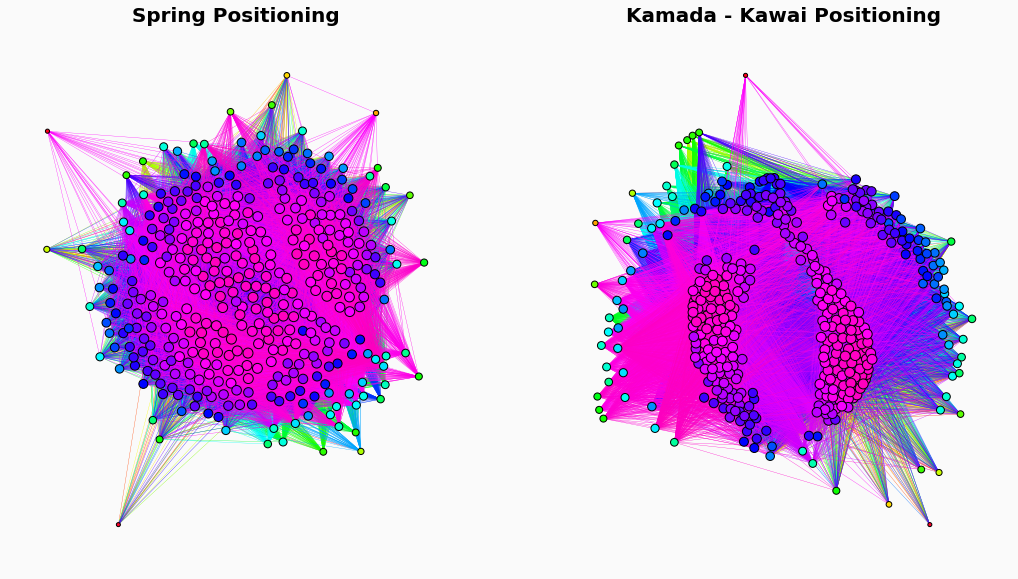

In [102]:
pos_spring= nx.spring_layout(G_protein_disease,k=0.7)
pos_kawai= nx.kamada_kawai_layout(G_protein_disease)

deg_centrality = nx.degree_centrality(G_protein_disease)
centrality = np.fromiter(deg_centrality.values(), float)

fig=plt.figure(1,figsize=(18,10),facecolor='#fafafa')
gs = fig.add_gridspec(1, 2)

"""----Graph Options----"""

Graph=G_protein_disease
size_coef=200
edge_width=0.3
edgeColor=range(Graph.number_of_edges())
nodeSize=centrality*size_coef
nodeColor=centrality
nodeCmap=plt.cm.gist_rainbow
edgeCmap=plt.cm.gist_rainbow
node_border_color='black'

"""---------Spring---------"""
ax1 = fig.add_subplot(gs[0, 0])
nx.draw_networkx_nodes(Graph, pos_spring, node_size=nodeSize, node_color=nodeColor,cmap=nodeCmap,edgecolors=node_border_color)
nx.draw_networkx_edges(Graph, pos_spring, width=edge_width, style="solid", edge_color=edgeColor, edge_cmap=edgeCmap)
plt.title(label="Spring Positioning",fontsize=20,color="black",fontweight='bold')
plt.axis('off')

"""---------Kamada - Kawai---------"""
ax2 = fig.add_subplot(gs[0, 1])
nx.draw_networkx_nodes(Graph, pos_kawai, node_size=nodeSize, node_color=nodeColor,cmap=nodeCmap,edgecolors=node_border_color)
nx.draw_networkx_edges(Graph, pos_kawai, width=edge_width, style="solid", edge_color=edgeColor,edge_cmap=edgeCmap)
plt.title(label="Kamada - Kawai Positioning",fontsize=20,color="black",fontweight='bold')
plt.axis('off')

plt.show()

##Generating Drug and Protein Feature Matrix

In [103]:
def Jaccard_Sim(M):
  jac=1-pdist(M,'jaccard')
  jac=squareform(jac)
  jac=jac+np.eye(len(jac))
  jac=np.nan_to_num(jac)
  return jac

def RandomWalk(M,iteration,RProb,net):
  n=len(M)

  Z=M/M.sum(axis=0)
  
  restart=np.eye(n)
  S=np.eye(n)
  for i in range(1,iteration):
    sNew=(1-RProb)*np.dot(Z,S)+restart*RProb
    D=np.linalg.norm((S-sNew))
    S=sNew
    if D<1e-6:
      break
    return S

#Compact Feature learning Algorithm
def DCA(networks,dim,rsp,maxiter):
  i=1
  P=np.array([])
  for network in networks:
    M=network.values
    tQ=RandomWalk(M,maxiter,rsp,network)
    if i==1:
      P=tQ
    else:
      #concatenate network
      P=np.hstack((P,tQ))
    i+=1
    print(P.shape)
    nnode=len(P)
    alpha=1/nnode
    P=np.log(P+alpha)-math.log(alpha)
    P=np.dot(P,P.T)
    
    #use SVD to decompose matrix
    U,Sigma,VT=la.svd(P,lapack_driver='gesvd',full_matrices=True)
    sigd=np.dot(np.eye(dim),np.diag(Sigma[:dim]))
    Ud=U[:,:dim]
    #get context-feature matrix, since we use P*PT to get square matrix, we need to sqrt twice
    X=np.dot(Ud,np.sqrt(np.sqrt(sigd)))
    return X,P,U,np.sqrt(np.sqrt(sigd))

In [104]:
"Drug List"
df_drug= pd.read_table("drug.txt",header=None)

"Side Effect List"
df_se=pd.read_table("se.txt",header=None)

"Disease List"
df_disease= pd.read_table("disease.txt",header=None)

"Protein List"
df_protein= pd.read_table("protein.txt",header=None)

"Drug - Drug Interaction Matrix"
df_mat_drug_drug= pd.read_table("mat_drug_drug.txt",sep=' ',header=None)
df_mat_drug_drug.index=df_drug[0].values

"Drug - SideEffect Interaction Matrix"
df_mat_drug_se= pd.read_table("mat_drug_se.txt",sep=' ',header=None)
df_mat_drug_se.index=df_drug[0].values

"Drug - Disease Interaction Matrix"
df_mat_drug_disease= pd.read_table("mat_drug_disease.txt",sep=' ',header=None)
df_mat_drug_disease.index=df_drug[0].values

"Drug - Protein Interaction Matrix"
df_mat_drug_protein= pd.read_table("mat_drug_protein.txt",sep=' ',header=None)

"Protein-Protein Interaction Matrix"
df_mat_protein_protein= pd.read_table("mat_protein_protein.txt",sep=' ',header=None)

"Protein - Disease Interaction Matrix"
df_mat_protein_disease= pd.read_table("mat_protein_disease.txt",sep=' ',header=None)


"Drug - Drug "
jac_sim_drug_drug =Jaccard_Sim(df_mat_drug_protein)
jac_sim_drug_drug=pd.DataFrame(jac_sim_drug_drug)

"Drug - Disease "
jac_sim_drug_disease =Jaccard_Sim(df_mat_drug_disease)
jac_sim_drug_disease=pd.DataFrame(jac_sim_drug_disease)

"Drug - SideEffect "
jac_sim_drug_se =Jaccard_Sim(df_mat_drug_se)
jac_sim_drug_se=pd.DataFrame(jac_sim_drug_se)

"Similarity Matrices"
sim_mat_drug=pd.read_table('Similarity_Matrix_Drugs.txt',sep='    ',header=None)
sim_mat_protein=pd.read_table('Similarity_Matrix_Proteins.txt',sep=' ',header=None)
sim_mat_protein=sim_mat_protein/100

drug_nets=[jac_sim_drug_drug,jac_sim_drug_disease,jac_sim_drug_se,sim_mat_drug]

"Protein - Protein "
jac_sim_protein_protein =Jaccard_Sim(df_mat_protein_protein)
jac_sim_protein_protein=pd.DataFrame(jac_sim_protein_protein)

"Protein - Disease "
jac_sim_protein_disease =Jaccard_Sim(df_mat_protein_disease)
jac_sim_protein_disease =pd.DataFrame(jac_sim_protein_disease )

"Protein Similarities"
sim_mat_protein=pd.read_table('Similarity_Matrix_Proteins.txt',sep=' ',header=None)

protein_nets=[jac_sim_protein_protein,jac_sim_protein_disease,sim_mat_protein]

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [105]:
maxiter = 20
restartProb = 0.50
dim_drug = 100
dim_protein = 400

X=DCA(drug_nets,dim_drug,restartProb,maxiter)
Y=DCA(protein_nets,dim_protein,restartProb,maxiter)

(708, 708)
(1512, 1512)


In [106]:
X_=pd.DataFrame(X[0])
Y_=pd.DataFrame(Y[0])
X_

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-2.375370e-16,9.883993e-05,-1.242905e-05,1.168516e-04,3.472866e-04,1.968007e-03,-8.236579e-03,-2.368585e-02,2.444588e-03,2.620720e-03,...,6.569890e-02,-2.575715e-01,1.007969e-01,-8.004559e-02,-1.219871e-15,-7.337534e-02,1.043175e+00,4.771677e-01,-2.196186e-01,-3.068047e-01
1,-1.095890e+00,7.584102e-17,3.559066e-16,-6.341211e-16,-6.978491e-16,7.517600e-16,8.457365e-16,1.954163e-15,2.072832e-16,5.828856e-16,...,-3.898569e-15,-8.148183e-15,3.718959e-15,2.419655e-15,8.218067e-17,2.542562e-15,8.530570e-16,8.623461e-15,-2.921372e-15,-8.762363e-15
2,-9.949634e-16,5.895590e-07,-2.417510e-03,-1.239480e-04,-1.898534e-05,1.353004e-05,1.327321e-05,-1.848026e-06,2.808548e-05,-4.364659e-05,...,3.056200e-03,4.082816e-03,2.345475e-05,1.015624e-04,-2.149970e-15,-8.741085e-05,2.492809e-03,-2.789044e-03,8.191610e-03,-2.852640e-02
3,4.375150e-16,1.243739e-04,-6.135471e-05,9.035479e-05,5.942026e-04,-1.210940e-03,-1.912374e-03,-2.216915e-03,-6.577799e-03,1.260684e-02,...,-6.719629e-04,-1.214711e-03,-2.510820e-03,1.882790e-03,5.498811e-17,2.400367e-04,6.112544e-04,-2.879159e-04,-1.624511e-03,-2.520204e-03
4,-2.565704e-16,3.219351e-01,-4.610592e-03,3.950600e-02,2.504211e-01,1.829023e-01,-5.287854e-01,1.270980e-01,-7.926905e-01,-6.104679e-01,...,-1.979268e-02,1.303703e-02,1.538552e-02,-1.139604e-01,2.193223e-15,-3.959286e-02,1.781396e-02,-1.377847e-02,8.250159e-03,2.883212e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,5.547163e-16,8.898365e-01,9.743389e-03,-8.227367e-02,-5.377475e-01,2.475415e-01,1.933239e-01,-2.946682e-02,-1.013584e-01,2.244794e-02,...,-3.949756e-02,-5.993742e-02,9.589174e-02,1.223440e-01,-2.299348e-15,3.706349e-02,9.903346e-03,-1.703269e-02,-9.144133e-03,-1.710283e-02
704,3.338224e-17,1.300595e-01,-3.360260e-03,4.017509e-02,1.459359e-01,5.694655e-01,-1.232192e+00,2.161363e-01,8.231801e-01,3.881580e-01,...,-1.077075e-02,-2.150371e-02,7.737585e-03,-3.739336e-02,4.833316e-16,-1.021861e-02,-1.932197e-03,4.856137e-02,6.660502e-03,1.939996e-03
705,-1.095890e+00,4.159936e-17,1.914855e-16,-2.783244e-16,8.815941e-17,-2.484675e-16,-1.560925e-16,-5.131346e-19,-3.219592e-16,9.591199e-17,...,9.156146e-16,1.059536e-15,8.548305e-16,-7.105217e-16,2.448512e-17,-2.047755e-16,6.534150e-16,7.062129e-16,-8.986882e-16,-8.664109e-16
706,-1.095890e+00,4.159936e-17,1.786212e-16,-2.822104e-16,8.903007e-17,-2.461753e-16,-1.533719e-16,-1.339481e-18,-3.171031e-16,8.701636e-17,...,2.168553e-16,9.886854e-16,1.109717e-15,-3.933767e-16,7.737135e-18,-7.827025e-16,-1.518708e-15,5.957069e-16,-5.700542e-16,-8.016747e-16


In [107]:
Y_

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,-2.639554e-16,-1.491939e-01,1.556206e-01,-1.662608e-01,4.408504e-02,-5.294774e-03,2.815622e-01,7.976483e-01,8.956515e-01,-3.656048e-01,...,-1.255899e-16,-1.707914e-16,-1.719018e-15,-1.834423e-16,2.495878e-16,2.698418e-16,-4.459661e-16,-4.096324e-16,-2.796740e-15,-5.597891e-15
1,7.332802e-17,-7.776781e-02,4.803680e-02,-1.264400e-01,7.511549e-01,1.388868e-01,-1.360486e-02,3.884998e-02,-1.263971e-01,-3.328484e-01,...,-2.709445e-14,-9.162327e-16,-7.100992e-14,-3.329403e-14,-1.187868e-15,5.997191e-15,-2.154070e-15,4.071904e-15,2.704439e-14,-3.295752e-14
2,-1.539625e-16,-4.680062e-01,2.659539e-01,7.158471e-02,-8.053406e-02,-1.789369e-01,1.864019e-01,1.127016e-01,2.445543e-01,-5.343094e-01,...,5.166597e-14,2.785316e-15,1.410656e-13,7.239821e-14,4.201102e-15,-9.195341e-15,4.343313e-15,-6.719270e-15,-8.092796e-14,5.154806e-14
3,-6.455381e-17,-5.749891e-20,-1.128327e-16,-3.736322e-16,9.610844e-16,-3.012197e-16,6.397209e-16,-2.187087e-16,-2.890820e-16,-5.738488e-16,...,-9.223452e-02,1.425001e-03,-2.438343e-01,-1.245067e-01,-2.963981e-03,2.747533e-02,-1.226399e-02,1.678137e-02,8.491355e-02,-1.304729e-01
4,-3.062197e-17,3.880304e-21,8.886115e-17,1.071636e-15,1.326949e-15,-3.702721e-17,3.295233e-15,1.712246e-15,3.775219e-16,6.443579e-16,...,5.261370e-03,3.725889e-03,1.567746e-02,-1.120805e-02,-3.126425e-03,-3.224648e-03,4.203210e-04,6.930579e-04,5.108155e-02,4.933467e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,-1.875890e-17,-8.625199e-03,2.066352e-02,9.567108e-03,-2.870673e-03,4.579199e-03,-1.924546e-02,-1.869401e-03,2.646056e-02,-3.295598e-02,...,-1.847746e-16,1.698001e-16,5.695125e-16,-9.195584e-16,1.449354e-16,4.793838e-17,-2.968333e-16,1.714606e-16,9.667802e-16,4.372998e-16
1508,-1.875890e-17,-8.625199e-03,2.066352e-02,9.567108e-03,-2.870673e-03,4.579199e-03,-1.924546e-02,-1.869401e-03,2.646056e-02,-3.295598e-02,...,-6.301580e-17,1.418292e-17,8.168753e-16,-6.279842e-16,-1.706868e-18,-3.215255e-17,7.353143e-17,1.183517e-16,1.163847e-15,-2.083934e-17
1509,3.050573e-16,-1.870374e-01,-1.332861e-02,2.735568e-02,-5.789053e-02,-5.392744e-02,6.555507e-02,2.064972e-01,-3.144148e-01,2.964499e-01,...,5.132760e-15,5.710637e-17,1.421605e-14,7.617657e-15,1.527851e-16,-7.547502e-16,7.952420e-16,-8.894136e-16,-1.719100e-15,3.144107e-15
1510,1.187506e+00,0.000000e+00,6.732991e-17,-2.936845e-17,-1.825948e-17,-5.849960e-17,1.175248e-16,-3.223272e-18,1.266106e-17,-6.165415e-17,...,-1.585387e-16,3.638215e-16,-3.942781e-17,-4.058144e-16,-1.305935e-16,-2.034432e-16,-1.895059e-16,-2.337930e-16,-2.894598e-16,-2.806751e-16


## Convolutional Network Model

In [108]:
def get_model():
 
  filters = 4
  kernel_size = 4

  convolution_1d_layer = keras.layers.Conv1D(filters, kernel_size,
                                             input_shape=(500, 1),
                                             strides=1, padding='same',
                                             activation="relu",
                                             name="convolution_1d_layer")

  # max pooling layer
  max_pooling_layer = keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="same", name="max_pooling_layer")

  # reshape layer
  reshape_layer = keras.layers.Flatten(name="reshape_layer")

  # dropout layer
  dropout_layer = keras.layers.Dropout(0.5, name="dropout_layer")

  # full connect layer
  full_connect_layer = keras.layers.Dense(128, activation="relu", name="full_connect_layer")

  model = keras.Sequential()
  model.add(convolution_1d_layer)
  model.add(max_pooling_layer)
  model.add(reshape_layer)
  model.add(dropout_layer)
  model.add(full_connect_layer)
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(
        optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
        loss='binary_crossentropy',
        metrics=['accuracy',metrics.AUC()]
    )
  print(model)
  return model

In [109]:
x = np.loadtxt('data.txt')
y = np.loadtxt('label.txt')
x = np.expand_dims(x, -1)
y = np.expand_dims(y, 1)

In [110]:
# print(x.shape)
kfold = StratifiedKFold(n_splits=10, random_state=222, shuffle=True)
test_auc, test_pr, preds = list(), list(), np.zeros((x.shape[0],))
for fold, (train_index, test_index) in enumerate(kfold.split(x, y)):
    print("-" * 10 + "No. :", fold + 1)

    y_train, y_test = y[train_index], y[test_index]
    x_train, x_test = x[train_index], x[test_index]

    # print(y_test.sum(), y_train.sum(), class_weight)

    model = get_model()
    if fold == 0:
      model.summary()

    pred = train_fold(model, x_train, y_train, x_test, y_test, x_test, y_test)
    preds[test_index] = pred[:, 0]
    test_auc.append(roc_auc_score(y_test, pred))
    precision, recall, thresholds = precision_recall_curve(y_test, pred)
    test_pr.append(auc(recall, precision))
    print("-" * 10 + "No. :", fold + 1)
    print("auroc = {:.4f} ".format(roc_auc_score(y_test, pred)) + "aupr = {:.4f} ".format(auc(recall, precision)))

print("10 fold auc :", test_auc)
print("10 fold mean auroc {:.5f}".format(np.mean(test_auc)))
print("10 fold mean aupr {:.5f}".format(np.mean(test_pr)))

----------No. : 1
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convolution_1d_layer (Conv1  (None, 500, 4)           20        
 D)                                                              
                                                                 
 max_pooling_layer (MaxPooli  (None, 250, 4)           0         
 ng1D)                                                           
                                                                 
 reshape_layer (Flatten)     (None, 1000)              0         
                                                                 
 dropout_layer (Dropout)     (None, 1000)              0         
                                                                 
 full_connect_layer (Dense)  (None, 128)               128128    


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 128,277
Trainable params: 128,277
Non-trainable params: 0
_________________________________________________________________
Train on 3461 samples, validate on 385 samples
Epoch 1/35
3328/3461 [===========================>..] - ETA: 0s - loss: 0.7871 - accuracy: 0.6319 - auc_10: 0.6771

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


3461/3461 [==============================] - 1s 415us/sample - loss: 0.7752 - accuracy: 0.6359 - auc_10: 0.6832 - val_loss: 0.4927 - val_accuracy: 0.7922 - val_auc_10: 0.8454
Epoch 2/35
3461/3461 [==============================] - 1s 239us/sample - loss: 0.5330 - accuracy: 0.7330 - auc_10: 0.8097 - val_loss: 0.4425 - val_accuracy: 0.8156 - val_auc_10: 0.8763
Epoch 3/35
3461/3461 [==============================] - 1s 233us/sample - loss: 0.4796 - accuracy: 0.7735 - auc_10: 0.8511 - val_loss: 0.4167 - val_accuracy: 0.8234 - val_auc_10: 0.8953
Epoch 4/35
3461/3461 [==============================] - 1s 231us/sample - loss: 0.4600 - accuracy: 0.7850 - auc_10: 0.8643 - val_loss: 0.4144 - val_accuracy: 0.8156 - val_auc_10: 0.9007
Epoch 5/35
3461/3461 [==============================] - 1s 227us/sample - loss: 0.4343 - accuracy: 0.8076 - auc_10: 0.8797 - val_loss: 0.3982 - val_accuracy: 0.8312 - val_auc_10: 0.9125
Epoch 6/35
3461/3461 [==============================] - 1s 231us/sample - loss: 0

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


----------No. : 1
auroc = 0.9457 aupr = 0.9463 
----------No. : 2


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train on 3461 samples, validate on 385 samples
Epoch 1/35
3392/3461 [============================>.] - ETA: 0s - loss: 0.6837 - accuracy: 0.6704 - auc_11: 0.7201

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


3461/3461 [==============================] - 1s 428us/sample - loss: 0.6825 - accuracy: 0.6700 - auc_11: 0.7204 - val_loss: 0.5214 - val_accuracy: 0.7584 - val_auc_11: 0.8506
Epoch 2/35
3461/3461 [==============================] - 1s 232us/sample - loss: 0.5202 - accuracy: 0.7495 - auc_11: 0.8211 - val_loss: 0.4547 - val_accuracy: 0.7922 - val_auc_11: 0.8770
Epoch 3/35
3461/3461 [==============================] - 1s 237us/sample - loss: 0.4923 - accuracy: 0.7680 - auc_11: 0.8427 - val_loss: 0.4417 - val_accuracy: 0.7922 - val_auc_11: 0.8855
Epoch 4/35
3461/3461 [==============================] - 1s 231us/sample - loss: 0.4539 - accuracy: 0.7914 - auc_11: 0.8679 - val_loss: 0.4246 - val_accuracy: 0.8130 - val_auc_11: 0.8837
Epoch 5/35
3461/3461 [==============================] - 1s 234us/sample - loss: 0.4252 - accuracy: 0.8139 - auc_11: 0.8858 - val_loss: 0.3987 - val_accuracy: 0.8182 - val_auc_11: 0.9008
Epoch 6/35
3461/3461 [==============================] - 1s 238us/sample - loss: 0

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


----------No. : 2
auroc = 0.9298 aupr = 0.9322 
----------No. : 3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train on 3461 samples, validate on 385 samples
Epoch 1/35
3456/3461 [============================>.] - ETA: 0s - loss: 0.8145 - accuracy: 0.6403 - auc_12: 0.6884

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


3461/3461 [==============================] - 2s 714us/sample - loss: 0.8149 - accuracy: 0.6400 - auc_12: 0.6880 - val_loss: 0.5439 - val_accuracy: 0.7169 - val_auc_12: 0.8231
Epoch 2/35
3461/3461 [==============================] - 2s 486us/sample - loss: 0.5584 - accuracy: 0.7272 - auc_12: 0.7944 - val_loss: 0.4719 - val_accuracy: 0.7740 - val_auc_12: 0.8761
Epoch 3/35
3461/3461 [==============================] - 1s 252us/sample - loss: 0.5175 - accuracy: 0.7426 - auc_12: 0.8217 - val_loss: 0.4394 - val_accuracy: 0.8026 - val_auc_12: 0.8946
Epoch 4/35
3461/3461 [==============================] - 1s 230us/sample - loss: 0.4933 - accuracy: 0.7637 - auc_12: 0.8389 - val_loss: 0.4199 - val_accuracy: 0.7974 - val_auc_12: 0.8976
Epoch 5/35
3461/3461 [==============================] - 1s 234us/sample - loss: 0.4549 - accuracy: 0.7905 - auc_12: 0.8678 - val_loss: 0.4065 - val_accuracy: 0.8182 - val_auc_12: 0.9122
Epoch 6/35
3461/3461 [==============================] - 1s 231us/sample - loss: 0

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


----------No. : 3
auroc = 0.9498 aupr = 0.9577 
----------No. : 4


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train on 3461 samples, validate on 385 samples
Epoch 1/35
3392/3461 [============================>.] - ETA: 0s - loss: 0.6881 - accuracy: 0.6595 - auc_13: 0.7160

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


3461/3461 [==============================] - 2s 441us/sample - loss: 0.6847 - accuracy: 0.6611 - auc_13: 0.7185 - val_loss: 0.5415 - val_accuracy: 0.7325 - val_auc_13: 0.8342
Epoch 2/35
3461/3461 [==============================] - 1s 236us/sample - loss: 0.5126 - accuracy: 0.7602 - auc_13: 0.8259 - val_loss: 0.4909 - val_accuracy: 0.7766 - val_auc_13: 0.8547
Epoch 3/35
3461/3461 [==============================] - 1s 232us/sample - loss: 0.4876 - accuracy: 0.7660 - auc_13: 0.8436 - val_loss: 0.4739 - val_accuracy: 0.7792 - val_auc_13: 0.8574
Epoch 4/35
3461/3461 [==============================] - 1s 232us/sample - loss: 0.4537 - accuracy: 0.7850 - auc_13: 0.8683 - val_loss: 0.4592 - val_accuracy: 0.7922 - val_auc_13: 0.8706
Epoch 5/35
3461/3461 [==============================] - 1s 236us/sample - loss: 0.4435 - accuracy: 0.7879 - auc_13: 0.8738 - val_loss: 0.4320 - val_accuracy: 0.8234 - val_auc_13: 0.8909
Epoch 6/35
3461/3461 [==============================] - 1s 230us/sample - loss: 0

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


----------No. : 4
auroc = 0.9210 aupr = 0.9234 
----------No. : 5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train on 3461 samples, validate on 385 samples
Epoch 1/35
3328/3461 [===========================>..] - ETA: 0s - loss: 0.7142 - accuracy: 0.6478 - auc_14: 0.6940

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


3461/3461 [==============================] - 2s 444us/sample - loss: 0.7101 - accuracy: 0.6489 - auc_14: 0.6962 - val_loss: 0.5455 - val_accuracy: 0.7117 - val_auc_14: 0.8352
Epoch 2/35
3461/3461 [==============================] - 1s 232us/sample - loss: 0.5202 - accuracy: 0.7452 - auc_14: 0.8197 - val_loss: 0.5202 - val_accuracy: 0.7429 - val_auc_14: 0.8615
Epoch 3/35
3461/3461 [==============================] - 1s 234us/sample - loss: 0.4827 - accuracy: 0.7691 - auc_14: 0.8478 - val_loss: 0.4576 - val_accuracy: 0.7974 - val_auc_14: 0.8699
Epoch 4/35
3461/3461 [==============================] - 1s 234us/sample - loss: 0.4521 - accuracy: 0.7928 - auc_14: 0.8671 - val_loss: 0.4372 - val_accuracy: 0.7922 - val_auc_14: 0.8864
Epoch 5/35
3461/3461 [==============================] - 1s 234us/sample - loss: 0.4060 - accuracy: 0.8191 - auc_14: 0.8963 - val_loss: 0.4077 - val_accuracy: 0.8286 - val_auc_14: 0.8982
Epoch 6/35
3461/3461 [==============================] - 1s 233us/sample - loss: 0

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


----------No. : 5
auroc = 0.9435 aupr = 0.9423 
----------No. : 6


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train on 3461 samples, validate on 385 samples
Epoch 1/35
3328/3461 [===========================>..] - ETA: 0s - loss: 0.8605 - accuracy: 0.6274 - auc_15: 0.6605

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


3461/3461 [==============================] - 2s 465us/sample - loss: 0.8510 - accuracy: 0.6307 - auc_15: 0.6644 - val_loss: 0.5457 - val_accuracy: 0.6987 - val_auc_15: 0.8038
Epoch 2/35
3461/3461 [==============================] - 1s 233us/sample - loss: 0.5645 - accuracy: 0.7157 - auc_15: 0.7885 - val_loss: 0.5101 - val_accuracy: 0.7610 - val_auc_15: 0.8343
Epoch 3/35
3461/3461 [==============================] - 1s 344us/sample - loss: 0.5264 - accuracy: 0.7408 - auc_15: 0.8165 - val_loss: 0.4802 - val_accuracy: 0.7714 - val_auc_15: 0.8546
Epoch 4/35
3461/3461 [==============================] - 2s 477us/sample - loss: 0.4723 - accuracy: 0.7772 - auc_15: 0.8545 - val_loss: 0.4502 - val_accuracy: 0.7662 - val_auc_15: 0.8646
Epoch 5/35
3461/3461 [==============================] - 1s 433us/sample - loss: 0.4638 - accuracy: 0.7821 - auc_15: 0.8615 - val_loss: 0.4571 - val_accuracy: 0.8000 - val_auc_15: 0.8651
Epoch 6/35
3461/3461 [==============================] - 2s 441us/sample - loss: 0

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


----------No. : 6
auroc = 0.9156 aupr = 0.9342 
----------No. : 7


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train on 3462 samples, validate on 384 samples
Epoch 1/35
3328/3462 [===========================>..] - ETA: 0s - loss: 0.8932 - accuracy: 0.6124 - auc_16: 0.6503

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


3462/3462 [==============================] - 2s 473us/sample - loss: 0.8798 - accuracy: 0.6158 - auc_16: 0.6551 - val_loss: 0.6210 - val_accuracy: 0.6458 - val_auc_16: 0.7881
Epoch 2/35
3462/3462 [==============================] - 1s 247us/sample - loss: 0.5643 - accuracy: 0.7129 - auc_16: 0.7850 - val_loss: 0.5186 - val_accuracy: 0.7344 - val_auc_16: 0.8279
Epoch 3/35
3462/3462 [==============================] - 1s 237us/sample - loss: 0.5240 - accuracy: 0.7487 - auc_16: 0.8193 - val_loss: 0.5102 - val_accuracy: 0.7448 - val_auc_16: 0.8477
Epoch 4/35
3462/3462 [==============================] - 1s 229us/sample - loss: 0.4868 - accuracy: 0.7721 - auc_16: 0.8456 - val_loss: 0.4882 - val_accuracy: 0.7656 - val_auc_16: 0.8720
Epoch 5/35
3462/3462 [==============================] - 1s 232us/sample - loss: 0.4564 - accuracy: 0.7828 - auc_16: 0.8647 - val_loss: 0.4567 - val_accuracy: 0.7943 - val_auc_16: 0.8736
Epoch 6/35
3462/3462 [==============================] - 1s 246us/sample - loss: 0

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


----------No. : 7
auroc = 0.9263 aupr = 0.9397 
----------No. : 8


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train on 3462 samples, validate on 384 samples
Epoch 1/35
3392/3462 [============================>.] - ETA: 0s - loss: 0.8247 - accuracy: 0.6120 - auc_17: 0.6528

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


3462/3462 [==============================] - 2s 483us/sample - loss: 0.8219 - accuracy: 0.6118 - auc_17: 0.6529 - val_loss: 0.5234 - val_accuracy: 0.7422 - val_auc_17: 0.8275
Epoch 2/35
3462/3462 [==============================] - 1s 236us/sample - loss: 0.5701 - accuracy: 0.7097 - auc_17: 0.7832 - val_loss: 0.5296 - val_accuracy: 0.7031 - val_auc_17: 0.8515
Epoch 3/35
3462/3462 [==============================] - 1s 233us/sample - loss: 0.5384 - accuracy: 0.7369 - auc_17: 0.8079 - val_loss: 0.4620 - val_accuracy: 0.7865 - val_auc_17: 0.8785
Epoch 4/35
3462/3462 [==============================] - 1s 234us/sample - loss: 0.5252 - accuracy: 0.7360 - auc_17: 0.8155 - val_loss: 0.4317 - val_accuracy: 0.8151 - val_auc_17: 0.8952
Epoch 5/35
3462/3462 [==============================] - 1s 234us/sample - loss: 0.4687 - accuracy: 0.7741 - auc_17: 0.8561 - val_loss: 0.4048 - val_accuracy: 0.8307 - val_auc_17: 0.9035
Epoch 6/35
3462/3462 [==============================] - 1s 232us/sample - loss: 0

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


----------No. : 8
auroc = 0.9503 aupr = 0.9602 
----------No. : 9


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train on 3462 samples, validate on 384 samples
Epoch 1/35
3392/3462 [============================>.] - ETA: 0s - loss: 0.8407 - accuracy: 0.6406 - auc_18: 0.6814

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


3462/3462 [==============================] - 2s 490us/sample - loss: 0.8358 - accuracy: 0.6410 - auc_18: 0.6825 - val_loss: 0.5231 - val_accuracy: 0.7500 - val_auc_18: 0.8273
Epoch 2/35
3462/3462 [==============================] - 1s 238us/sample - loss: 0.5687 - accuracy: 0.7175 - auc_18: 0.7892 - val_loss: 0.4882 - val_accuracy: 0.7812 - val_auc_18: 0.8500
Epoch 3/35
3462/3462 [==============================] - 1s 235us/sample - loss: 0.5240 - accuracy: 0.7484 - auc_18: 0.8191 - val_loss: 0.4824 - val_accuracy: 0.7865 - val_auc_18: 0.8530
Epoch 4/35
3462/3462 [==============================] - 1s 238us/sample - loss: 0.5023 - accuracy: 0.7556 - auc_18: 0.8340 - val_loss: 0.4608 - val_accuracy: 0.7943 - val_auc_18: 0.8689
Epoch 5/35
3462/3462 [==============================] - 1s 237us/sample - loss: 0.4886 - accuracy: 0.7617 - auc_18: 0.8434 - val_loss: 0.4419 - val_accuracy: 0.8047 - val_auc_18: 0.8762
Epoch 6/35
3462/3462 [==============================] - 1s 238us/sample - loss: 0

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


----------No. : 9
auroc = 0.9360 aupr = 0.9377 
----------No. : 10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train on 3462 samples, validate on 384 samples
Epoch 1/35
3328/3462 [===========================>..] - ETA: 0s - loss: 0.8308 - accuracy: 0.6295 - auc_19: 0.6653

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


3462/3462 [==============================] - 2s 503us/sample - loss: 0.8222 - accuracy: 0.6311 - auc_19: 0.6680 - val_loss: 0.5255 - val_accuracy: 0.7422 - val_auc_19: 0.8266
Epoch 2/35
3462/3462 [==============================] - 1s 242us/sample - loss: 0.5810 - accuracy: 0.7028 - auc_19: 0.7767 - val_loss: 0.5175 - val_accuracy: 0.7734 - val_auc_19: 0.8377
Epoch 3/35
3462/3462 [==============================] - 1s 248us/sample - loss: 0.5496 - accuracy: 0.7184 - auc_19: 0.7948 - val_loss: 0.5077 - val_accuracy: 0.7786 - val_auc_19: 0.8539
Epoch 4/35
3462/3462 [==============================] - 1s 237us/sample - loss: 0.5191 - accuracy: 0.7467 - auc_19: 0.8192 - val_loss: 0.4811 - val_accuracy: 0.7839 - val_auc_19: 0.8588
Epoch 5/35
3462/3462 [==============================] - 1s 241us/sample - loss: 0.4986 - accuracy: 0.7553 - auc_19: 0.8359 - val_loss: 0.4923 - val_accuracy: 0.7708 - val_auc_19: 0.8740
Epoch 6/35
3462/3462 [==============================] - 1s 241us/sample - loss: 0

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


----------No. : 10
auroc = 0.9450 aupr = 0.9499 
10 fold auc : [0.9457037996545768, 0.9297819516407598, 0.949778713298791, 0.9210384283246977, 0.9435449050086355, 0.9156142055267702, 0.92626953125, 0.9503309461805555, 0.9359809027777778, 0.9450141059027778]
10 fold mean auroc 0.93631
10 fold mean aupr 0.94236
